In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.regularizers import l2


# utility libraries
import os
import time
import itertools
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_DenseNet201.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.3
best_batch_size	= 16
best_epochs	= 1


base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = BatchNormalization()(base_model.output) # JUST ADDED
x = Dropout(best_dropout)(x) # JUST ADDED
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(best_dropout)(x)
x = BatchNormalization()(x) # JUST ADDED

# final softmax probabilistic classification layer - JUST ADDED L2
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax', kernel_regularizer=l2(0.05))(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



Found 6108 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
191/191 [==============================] - 41s 130ms/step - loss: 1.6683 - accuracy: 0.6601 - val_loss: 1.4341 - val_accuracy: 0.6614


# Validation plots

14/14 [==============================] - 5s 123ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.583333,0.525000,0.552632,40.000000
american_house_spider,0.800000,0.700000,0.746667,40.000000
bedbug,0.687500,0.550000,0.611111,40.000000
brown_stink_bug,0.720930,0.775000,0.746988,40.000000
carpenter_ant,0.592593,0.800000,0.680851,40.000000
cellar_spider,0.891892,0.825000,0.857143,40.000000
flea,0.376812,0.650000,0.477064,40.000000
house_centipede,0.846154,0.825000,0.835443,40.000000
silverfish,0.909091,0.750000,0.821918,40.000000
subterranean_termite,0.511628,0.550000,0.530120,40.000000


<Figure size 800x600 with 0 Axes>

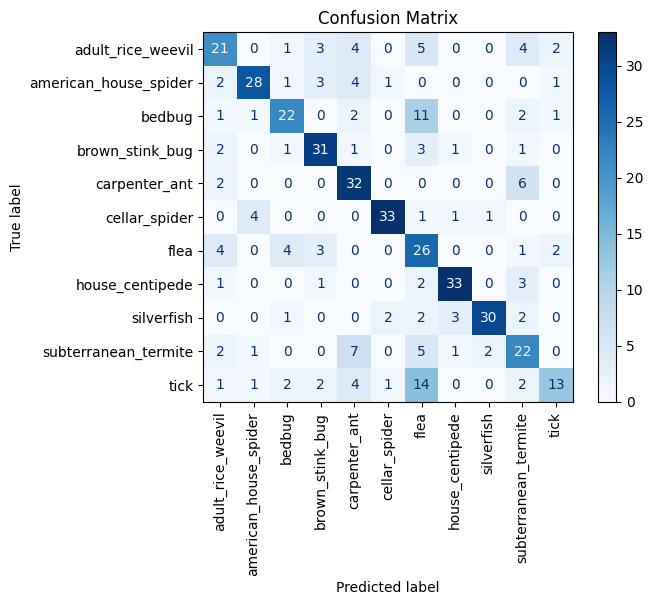

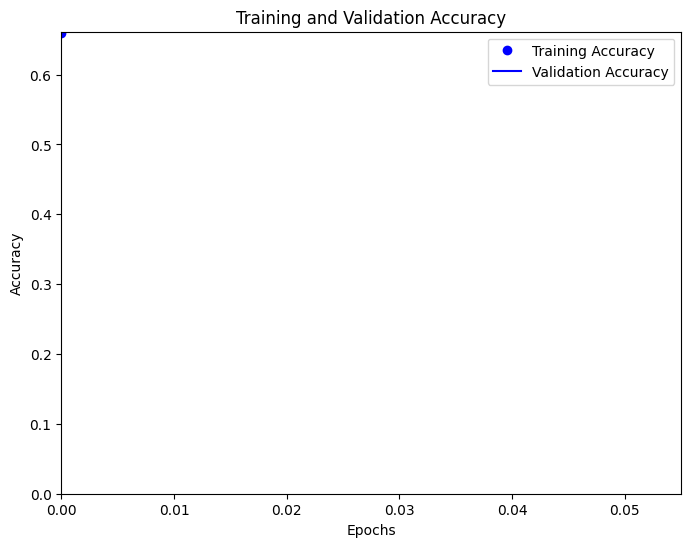

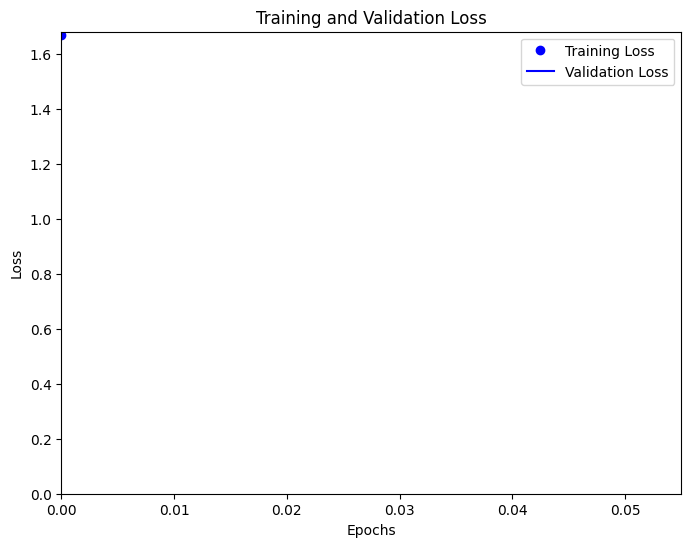

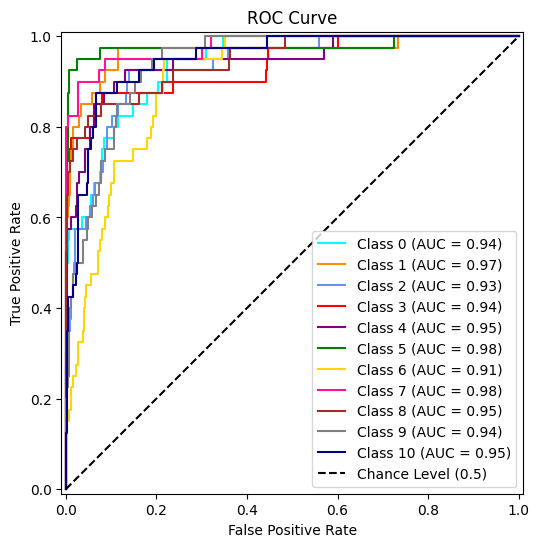

Macro-averaged One-vs-One ROC AUC score: 0.95
Accuracy: 0.661
Precision: 0.691
Recall: 0.661
F1 Score: 0.664


{'accuracy': 0.661,
 'precision': 0.691,
 'recall': 0.661,
 'f1_score': 0.664,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.583333  0.525000  0.552632   40.000000
 american_house_spider   0.800000  0.700000  0.746667   40.000000
 bedbug                  0.687500  0.550000  0.611111   40.000000
 brown_stink_bug         0.720930  0.775000  0.746988   40.000000
 carpenter_ant           0.592593  0.800000  0.680851   40.000000
 cellar_spider           0.891892  0.825000  0.857143   40.000000
 flea                    0.376812  0.650000  0.477064   40.000000
 house_centipede         0.846154  0.825000  0.835443   40.000000
 silverfish              0.909091  0.750000  0.821918   40.000000
 subterranean_termite    0.511628  0.550000  0.530120   40.000000
 tick                    0.684211  0.325000  0.440678   40.000000
 accuracy                0.661364  0.661364  0.661364    0.661364
 macro avg               0.691286  

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics: 'accuracy': 0.661,'precision': 0.691,'recall': 0.661,'f1_score': 0.664

# Test plots

7/7 [==============================] - 1s 160ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.666667,0.600000,0.631579,20.000000
american_house_spider,0.791667,0.950000,0.863636,20.000000
bedbug,0.650000,0.650000,0.650000,20.000000
brown_stink_bug,0.782609,0.900000,0.837209,20.000000
carpenter_ant,0.727273,0.800000,0.761905,20.000000
cellar_spider,0.750000,0.900000,0.818182,20.000000
flea,0.464286,0.650000,0.541667,20.000000
house_centipede,1.000000,0.800000,0.888889,20.000000
silverfish,0.933333,0.700000,0.800000,20.000000
subterranean_termite,0.700000,0.700000,0.700000,20.000000


<Figure size 800x600 with 0 Axes>

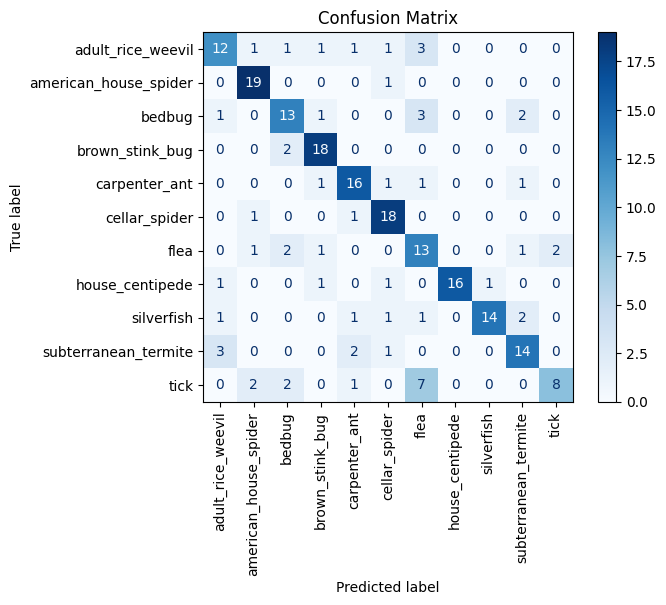

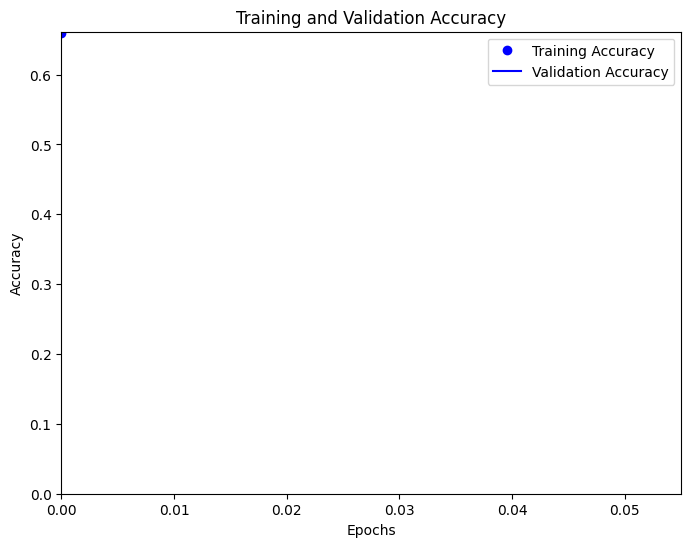

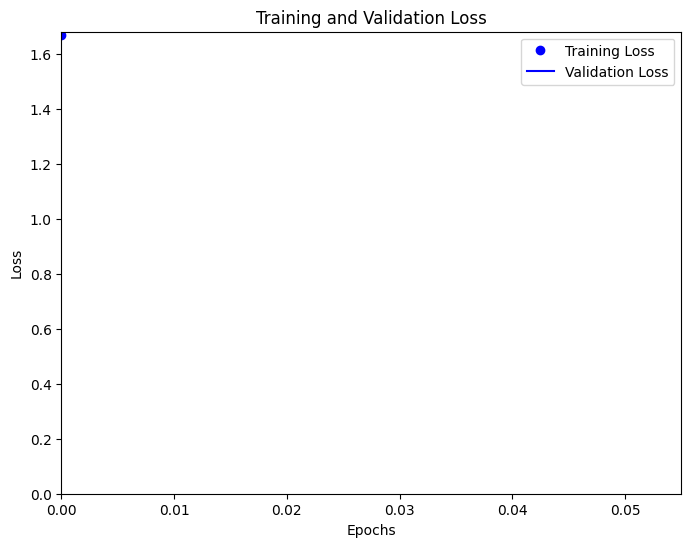

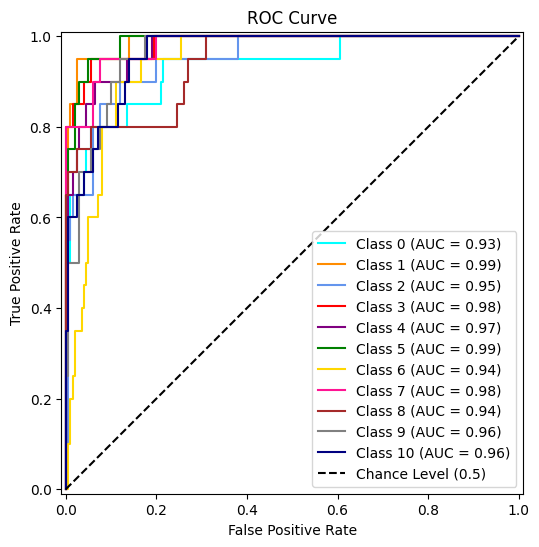

Macro-averaged One-vs-One ROC AUC score: 0.96
Accuracy: 0.732
Precision: 0.751
Recall: 0.732
F1 Score: 0.73


{'accuracy': 0.732,
 'precision': 0.751,
 'recall': 0.732,
 'f1_score': 0.73,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.666667  0.600000  0.631579   20.000000
 american_house_spider   0.791667  0.950000  0.863636   20.000000
 bedbug                  0.650000  0.650000  0.650000   20.000000
 brown_stink_bug         0.782609  0.900000  0.837209   20.000000
 carpenter_ant           0.727273  0.800000  0.761905   20.000000
 cellar_spider           0.750000  0.900000  0.818182   20.000000
 flea                    0.464286  0.650000  0.541667   20.000000
 house_centipede         1.000000  0.800000  0.888889   20.000000
 silverfish              0.933333  0.700000  0.800000   20.000000
 subterranean_termite    0.700000  0.700000  0.700000   20.000000
 tick                    0.800000  0.400000  0.533333   20.000000
 accuracy                0.731818  0.731818  0.731818    0.731818
 macro avg               0.751439  0

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.732, 'precision': 0.751,'recall': 0.732, 'f1_score': 0.73